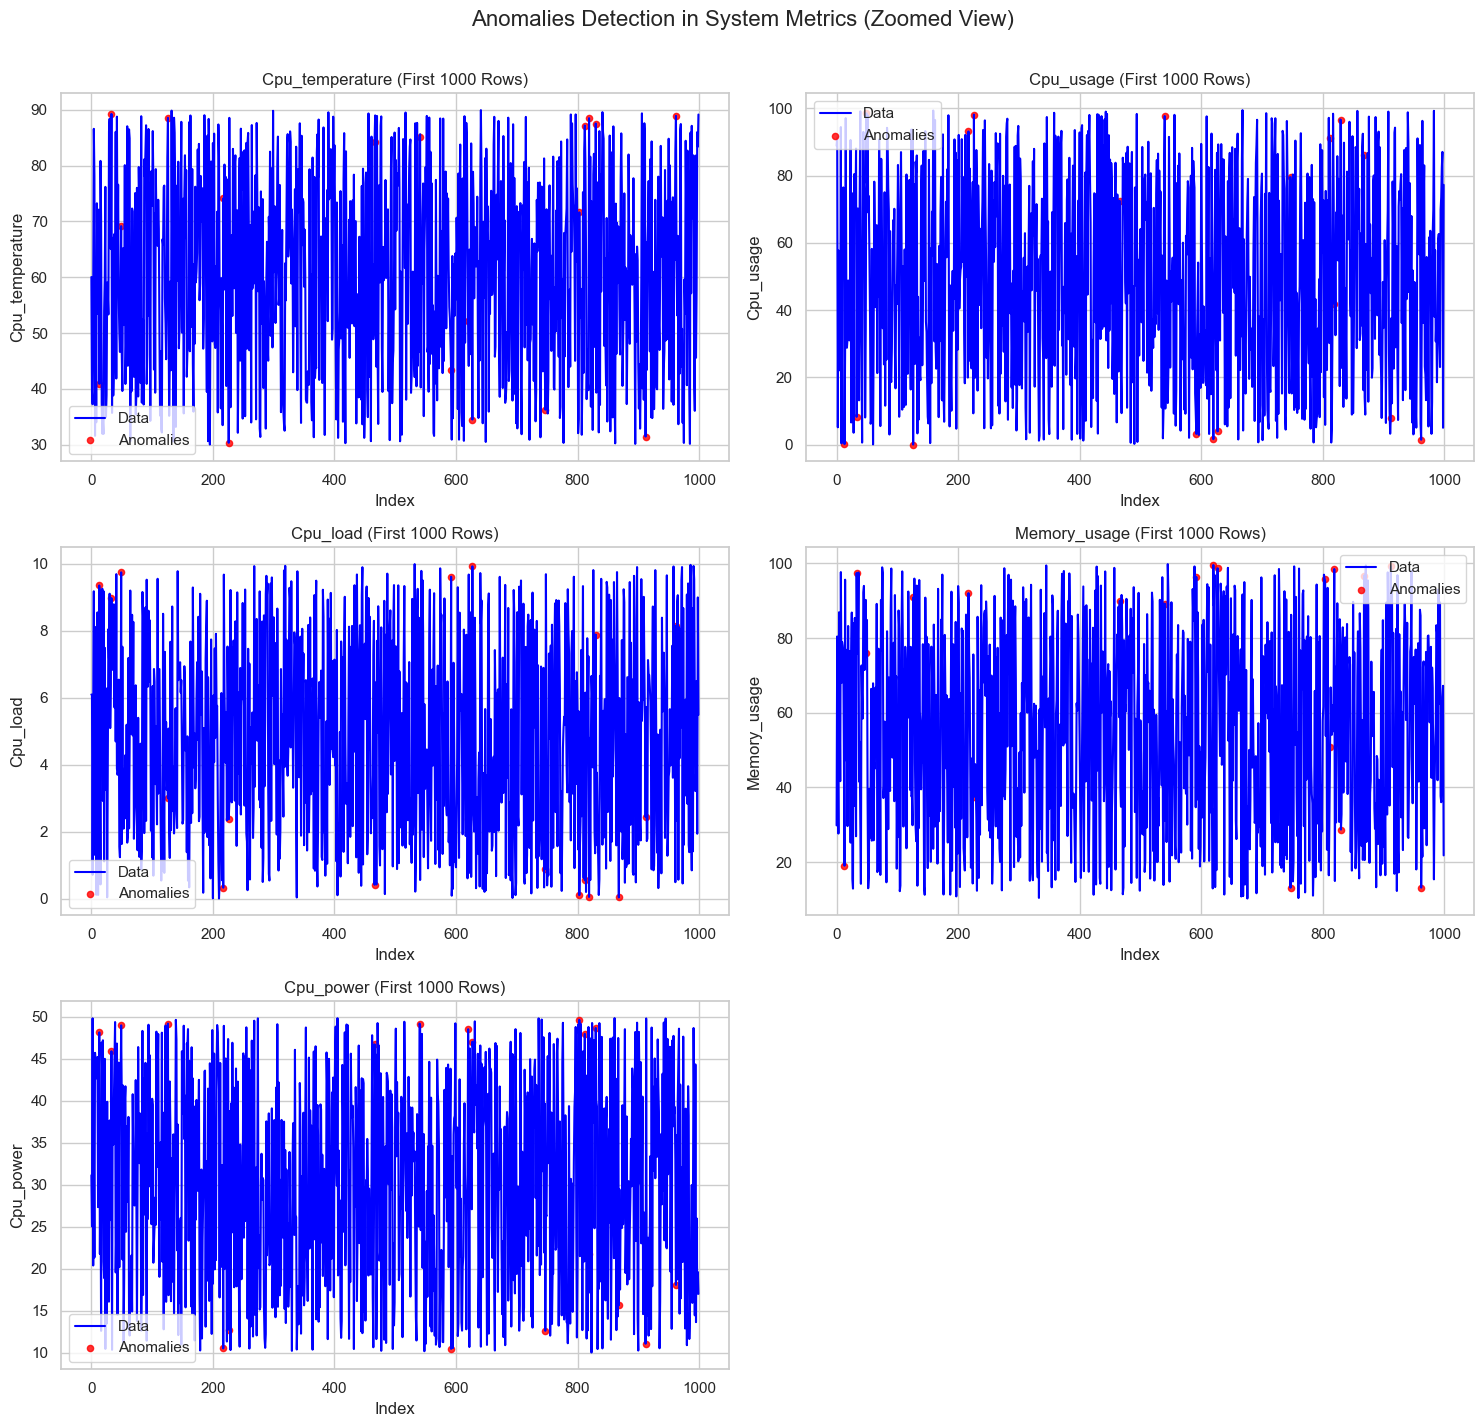

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

df_pandas = pd.read_csv(r"C:\Users\ashra\Downloads\hardware_monitor_data.csv")

columns_to_analyze = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']

missing_columns = [col for col in columns_to_analyze if col not in df_pandas.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {', '.join(missing_columns)}")


df_pandas = df_pandas.dropna(subset=columns_to_analyze)

# Initialize IsolationForest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model and predict anomalies
df_pandas['anomaly'] = model.fit_predict(df_pandas[columns_to_analyze])

# Improved visualization
# Filter only the first 1000 rows for clarity in visualization
subset_df = df_pandas.iloc[:1000]

# Create a plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15)) 
axes = axes.flatten()

# Loop through all metrics, including 'cpu_power'
for i, metric in enumerate(columns_to_analyze):
    if i >= len(axes): break  

    ax = axes[i]
    ax.plot(subset_df.index, subset_df[metric], color='blue', label="Data") 
    anomalies = subset_df[subset_df['anomaly'] == -1]  
    ax.scatter(anomalies.index, anomalies[metric], color='red', alpha=0.8, s=20, label="Anomalies")  
    ax.set_title(f"{metric.capitalize()} (First 1000 Rows)")
    ax.set_xlabel("Index")
    ax.set_ylabel(metric.capitalize())
    ax.legend()

for j in range(len(columns_to_analyze), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Anomalies Detection in System Metrics (Zoomed View)", fontsize=16)
plt.show()